In [ ]:
"""
機械学習で画像を分類する場合, 画像から特徴量を抽出して, その特徴量のパターンを機械学習の技術で学習する方法が考えられる.
この特徴量とは, 入力データから本質的なデータを的確に抽出できるように設計された変換器を指す.
画像の特徴量は通常, ベクトルとして記述される. そのような特徴量を使って, 画像データをベクトルに変換し, そのベクトルに対して
機械学習で使われる識別器(SVM, KNNなど)で学習されることができる.
このアプローチでは, 画像をベクトルに変換する際に使用する特徴量は, 人が設計しなければ, 良い結果が得られない.
一方で, ニューラルネットワークでは, 画像に含まれる特徴量までも機械が学習する.

[損失関数]
ニューラルネットワークの性能の悪さを表す指標.

- 二乗和誤差
- 交差エントロピー誤差
"""
pass

In [ ]:
"""
[二乗和誤差]
E = 1/2 * (sum(y - t) ** 2)
t: 正解データの配列
y: ニューラルネットワークの出力配列
"""
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [6]:
"""
[交差エントロピー誤差]
正解ラベルとなるインデックスのあたちの自然対数を出力する.
E = -1 * sum(t * log(y))
t: 正解ラベルのみ1, それ以外は0の配列
y: ニューラルネットワークの出力配列
"""
def cross_entropy_error(y, t):
    delta = 1e-7 # 微小値を追加して, np.log(0)のようなマイナス無限大を表す-infが発生することを防止
    return -np.sum(t * np.log(y + delta))

In [11]:
"""
[ミニバッチ学習]
対象データから一部をサンプリングし, 全体の近似として利用する.
数百万, 数千万のビッグデータを対象に, すべての損失関数を計算するのは現実的でないため.
"""
import sys, os
sys.path.append(os.pardir)
import numpy as np
from original.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # 訓練画像
print(t_train.shape) # 訓練ラベル

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

# 対象サンプル抽出
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)


(60000, 784)
(60000, 10)
[53165 21629 31181 48469 41953 21859   581 38086 46675  2922]
(10, 784)
(10, 10)


In [ ]:
# 交差エントロピー誤差をミニバッチに対応させる
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
"""
[数値微分(numerical differentiation)]
微小な差分によって微分を求める.
"""
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    # 数値微分の誤差を減らすため, 中心差分を計算する
    return (f(x+h) - f(x-h)) / (2 * h)

0.1999999999990898
-0.24999999999544897
0.2999999999986347
-0.9999999999863469


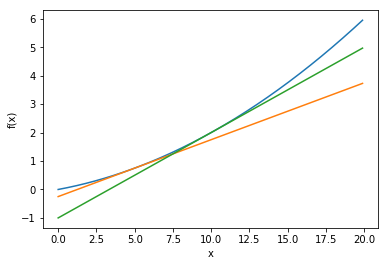

In [19]:
# 数値微分の例
# y = 0.01x**2 + 0.1x

def function_1(x):
    return 0.01*x**2 + 0.1*x

def tangent_line(f, x):
    """関数f(x)におけるxの接線の関数を返す"""
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    print(y)
    return lambda t: d*t + y

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

# 微分により求めたx=5の接線
tf = tangent_line(function_1, 5)
y2 = tf(x)

# x=10の接線
tf = tangent_line(function_1, 10)
y3 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

plt.show()

7.999999999999119
7.999999999999119
f(x0 = 0 x1 = 4), diff =  7.999999999999119
f(x0 = 1 x1 = 4), diff =  7.999999999999119
f(x0 = 2 x1 = 4), diff =  7.999999999999119
f(x0 = 3 x1 = 4), diff =  7.999999999999119
f(x0 = 4 x1 = 4), diff =  7.999999999999119


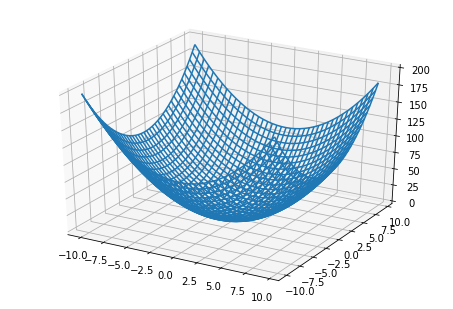

In [87]:
"""
[偏微分]
複数の変数からなる関数の微分
偏微分の場合は, 微分のターゲットとする変数を1つに絞り, 他の変数はある値に固定する.
"""

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def function_tmp_1(x1):
    return function_2(np.array([2, x1]))

def function_tmp_2(x1):
    return function_2(np.array([3, x1]))

print(numerical_diff(function_tmp_1, 4))
print(numerical_diff(function_tmp_2, 4))

def curry_function(x0):
    return lambda x1: function_2(np.array([x0, x1]))

for i in range(0, 5):
    f = curry_function(i)
    print("f(x0 =", i, "x1 = 4),", "diff = ", numerical_diff(f, 4))
    
# 3Dでプロットしてみる
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x0 = np.arange(-10, 10, 0.5)
x1 = np.arange(-10, 10, 0.5)
X, Y = np.meshgrid(x0, x1)

Z = []
for tx, ty in zip(X, Y):
    tz = []
    for x in zip(tx, ty):
        tz.append(function_2(np.array(x)))
    Z.append(tz)
Z = np.array(Z)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)
plt.show()